# Lab | Customer Analysis Round 5


## For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.



In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## We are using the marketing_customer_analysis.csv file.



In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

## Clean Data

In [3]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower()) 
data.columns = cols
cleaned_data = data.drop(['customer', 'effective to date'], axis=1)
# cleaned_data = cleaned_data['effective to date'].astype('datetime64[ns]')


In [4]:
# def cleaner (x):
#     x = x.rename(columns={'EmploymentStatus':'Employment Status'})#rename typos in columns
#     x['Effective To Date'] = x['Effective To Date'].astype('datetime64[ns]')#datatype
#     x = x.dropna()#drop nan values
            
#     return x    

# cleaned_data = cleaner(data)
# cleaned_data.head(5)

In [5]:
cleaned_data.head(5)

,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
cleaned_data.columns
cleaned_data.shape
cleaned_data.head(1)


,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


## Processing Data


### X-y split.


In [7]:
# Variable to predict
Y = cleaned_data['customer lifetime value']
# Save the new dropped data
data = cleaned_data.drop(['customer lifetime value'], axis=1)

#Split Categorical and Numerical
X_num = cleaned_data.select_dtypes(include = np.number)
X_cat = cleaned_data.select_dtypes(include = np.object)

In [8]:
X_num.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### Normalize (numerical).


In [9]:
from sklearn.preprocessing import Normalizer

In [10]:
# Fit the transformer to the normalizer
transformer = Normalizer().fit(X_num)
#Transform and normalise with the fit
x_normalized = transformer.transform(X_num)
#Make the normaliser into a dataframe
numerical_normalised_df = pd.DataFrame(x_normalized)
numerical_normalised_df

,0,1,2,3,4,5,6,7
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...,...
9129,0.309385,0.950932,0.000965,0.000238,0.001176,0.000000,0.000026,0.002620
9130,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
9131,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406
9132,0.324247,0.945493,0.004137,0.001465,0.000129,0.000000,0.000129,0.029786


### Add Column Headers to the Normalised Data

In [11]:
numerical_normalised_df.columns = X_num.columns
numerical_normalised_df.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


## One Hot/Label Encoding (categorical).


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
# x_cat_en.columns=list(en_x.get_feature_names())
# x_cat_en.head()

In [14]:
 #en_gender=array where gender will be encoded to bools
en_x = OneHotEncoder(handle_unknown='ignore')#OneHotEncoder(handle_unknown='ignore')
#categorical=where column gender is stored
en_x.fit(X_cat) 

en_x.categories_

en_x_array=en_x.transform(X_cat).toarray()
en_x_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [15]:
x_cat_en=pd.DataFrame(en_x_array)
x_cat_en.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
col_list=list([X_cat["state"].unique()])
print(type(col_list))
print(col_list)

<class 'list'>
[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)]


In [17]:
#print(en_x.categories_)
en_x.get_feature_names()

array(['x0_Arizona', 'x0_California', 'x0_Nevada', 'x0_Oregon',
       'x0_Washington', 'x1_No', 'x1_Yes', 'x2_Basic', 'x2_Extended',
       'x2_Premium', 'x3_Bachelor', 'x3_College', 'x3_Doctor',
       'x3_High School or Below', 'x3_Master', 'x4_Disabled',
       'x4_Employed', 'x4_Medical Leave', 'x4_Retired', 'x4_Unemployed',
       'x5_F', 'x5_M', 'x6_Rural', 'x6_Suburban', 'x6_Urban',
       'x7_Divorced', 'x7_Married', 'x7_Single', 'x8_Corporate Auto',
       'x8_Personal Auto', 'x8_Special Auto', 'x9_Corporate L1',
       'x9_Corporate L2', 'x9_Corporate L3', 'x9_Personal L1',
       'x9_Personal L2', 'x9_Personal L3', 'x9_Special L1',
       'x9_Special L2', 'x9_Special L3', 'x10_Offer1', 'x10_Offer2',
       'x10_Offer3', 'x10_Offer4', 'x11_Agent', 'x11_Branch',
       'x11_Call Center', 'x11_Web', 'x12_Four-Door Car',
       'x12_Luxury Car', 'x12_Luxury SUV', 'x12_SUV', 'x12_Sports Car',
       'x12_Two-Door Car', 'x13_Large', 'x13_Medsize', 'x13_Small'],
      dtype=object

In [18]:
col_list=[]

for i in X_cat:
    col_list.append(X_cat[i].unique())
    
col_list

[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
       dtype=object),
 array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Suburban', 'Rural', 'Urban'], dtype=object),
 array(['Married', 'Single', 'Divorced'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
        'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object),
 array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object),
 array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
        'Luxury Car'],

In [19]:
len(col_list)

14

In [20]:
a=list(en_x.get_feature_names())


In [21]:
x_cat_en.columns=list(en_x.get_feature_names())
x_cat_en.tail()

,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,x3_Bachelor,x3_College,x3_Doctor,x3_High School or Below,x3_Master,x4_Disabled,x4_Employed,x4_Medical Leave,x4_Retired,x4_Unemployed,x5_F,x5_M,x6_Rural,x6_Suburban,x6_Urban,x7_Divorced,x7_Married,x7_Single,x8_Corporate Auto,x8_Personal Auto,x8_Special Auto,x9_Corporate L1,x9_Corporate L2,x9_Corporate L3,x9_Personal L1,x9_Personal L2,x9_Personal L3,x9_Special L1,x9_Special L2,x9_Special L3,x10_Offer1,x10_Offer2,x10_Offer3,x10_Offer4,x11_Agent,x11_Branch,x11_Call Center,x11_Web,x12_Four-Door Car,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small
9129,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9133,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Concat DataFrames

In [22]:
concat_data = pd.concat([numerical_normalised_df, x_cat_en], axis=1)
concat_data.head(5)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,x3_Bachelor,x3_College,x3_Doctor,x3_High School or Below,x3_Master,x4_Disabled,x4_Employed,x4_Medical Leave,x4_Retired,x4_Unemployed,x5_F,x5_M,x6_Rural,x6_Suburban,x6_Urban,x7_Divorced,x7_Married,x7_Single,x8_Corporate Auto,x8_Personal Auto,x8_Special Auto,x9_Corporate L1,x9_Corporate L2,x9_Corporate L3,x9_Personal L1,x9_Personal L2,x9_Personal L3,x9_Special L1,x9_Special L2,x9_Special L3,x10_Offer1,x10_Offer2,x10_Offer3,x10_Offer4,x11_Agent,x11_Branch,x11_Call Center,x11_Web,x12_Four-Door Car,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Use the standard scale - so all the 

# Linear Regression


## Train-test split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(concat_data,Y,test_size=0.3,random_state=100)


## Apply linear regression.


In [24]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)

# Model Validation


## MSE

In [25]:
mse = mean_squared_error(y_test, predictions)
print(round(mse,2))

12742536.25


## RMSE

In [26]:
rmse = math.sqrt(mse)
print(round(rmse,2))

3569.67


## R2

In [27]:
r2 = r2_score(y_test, predictions)
print(round(r2,2))

0.74


## MAE

In [28]:
mae = mean_absolute_error(y_test, predictions)
print(round(mae,2))

2312.17


# Lab | Customer Analysis Round 7


## Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:



### use the concept of multicollinearity and remove insignificant variables

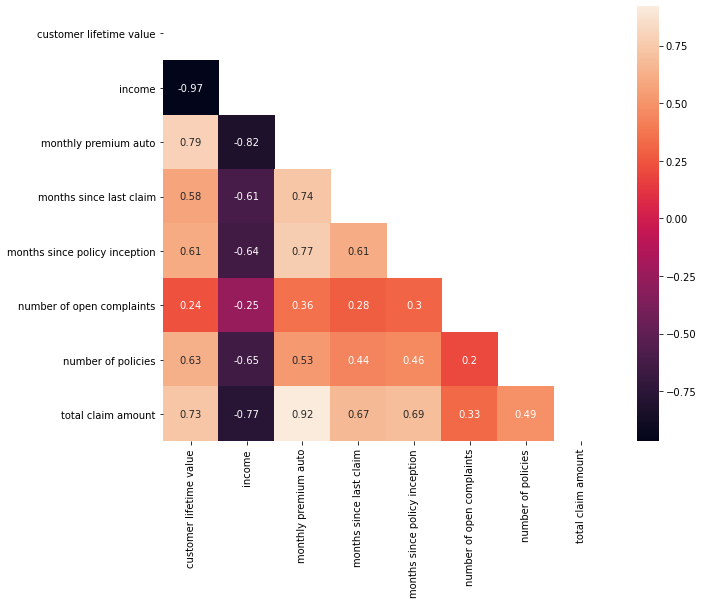

In [29]:
correlations_matrix = numerical_normalised_df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


### use a different ratio of train test split


use the transformation on numerical columns which align it more towards a normal distribution
